# Modeling-to-Generate-Alternatives (MGA) Tutorial

MGA is commonly used in energy modelling to address what is known as "structural uncertainty."
That is, the uncertainty stemming from unknown, unmodeled, or unmodel-able objectives. For instance,
political feasibility or some other qualitative variable.

## The MGA Idea

To get around this challenge, MGA searches the "sub-optimal" or "near-optimal" region for alternative
solutions by relaxing the objective function. The goal for a single-objective problem is to find 
"maximally different solutions in the design space." In multi-objective problems, specifically ones solved
with genetic algorithms, users can identify alternatives by random selection or farthest first traversal.

This tutorial will illustrate both methods.

## MGA Example \#1

In [1]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# pymoo imports
from pymoo.problems import get_problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

from osier import n_mga

In [2]:
problem = get_problem("bnh")

pop_size = 100
n_gen = 200
algorithm = NSGA2(pop_size=pop_size)

res = minimize(problem,
               algorithm,
               ('n_gen', n_gen),
               seed=1,
               verbose=False,
               save_history=True
               )


In [17]:
res.algorithm.pop_size

100

In [15]:
res.algorithm.n_gen

201

In [3]:
F = problem.pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75
slack = 0.2
alpha = 0.5
F1 = f1 * (1+slack)
F2 = f2 * (1+slack)

In [4]:
X_hist = np.array([history.pop.get("X") for history in res.history]).reshape(n_gen*pop_size,2)
F_hist = np.array([history.pop.get("F") for history in res.history]).reshape(n_gen*pop_size,2)

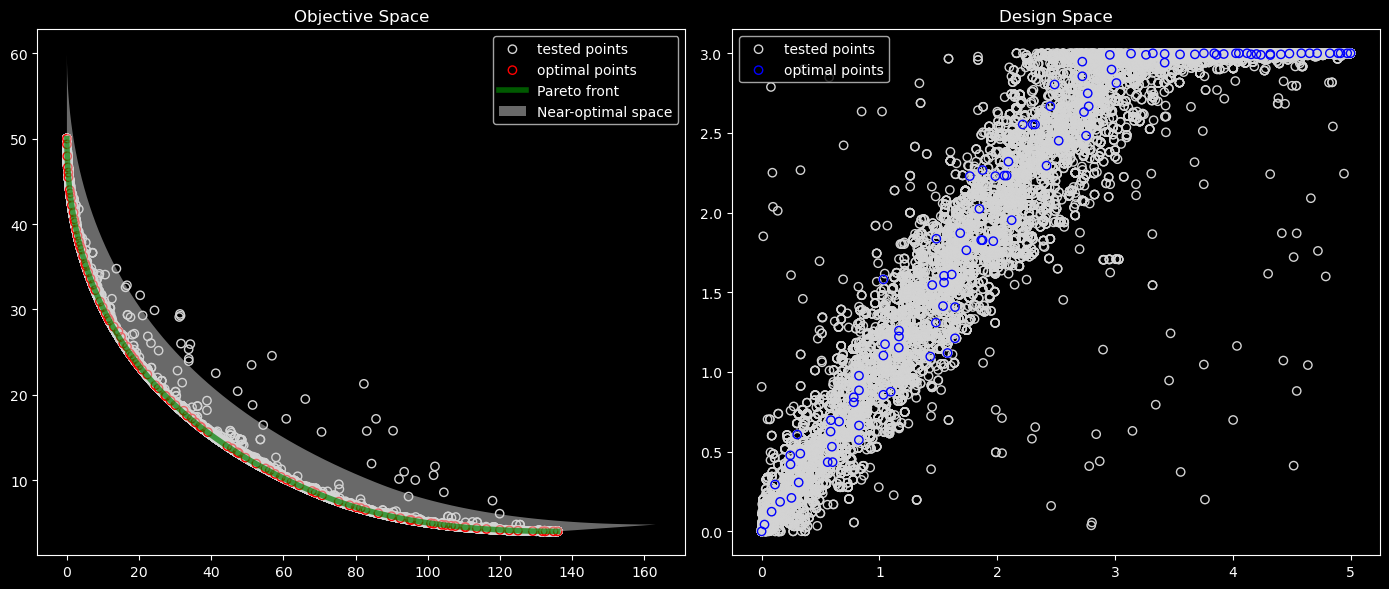

In [5]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(1,2, figsize=(14,6))

    ax[0].set_title("Objective Space")
    ax[0].scatter(F_hist[:,0], F_hist[:,1], facecolor="none", edgecolor="lightgray", label='tested points')
    ax[0].scatter(res.F[:,0], res.F[:,1], facecolor="none", edgecolor="red", label='optimal points')
    ax[0].plot(F[:,0], F[:,1], color="g", alpha=0.7, label='Pareto front', lw=4)
    ax[0].fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
    ax[0].legend()


    ax[1].set_title("Design Space")
    ax[1].scatter(X_hist[:,0], X_hist[:,1], facecolor="none", edgecolor="lightgray", label='tested points')
    ax[1].scatter(res.X[:,0], res.X[:,1], facecolor="none", edgecolor="blue", label='optimal points')
    ax[1].legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [6]:
from osier import distance_matrix, farthest_first

In [7]:
%time D = distance_matrix(X=X_hist)

CPU times: user 5.25 s, sys: 1.37 s, total: 6.62 s
Wall time: 6.64 s


In [8]:
idxs = farthest_first(X=X_hist, D=D, n_points=10)

In [10]:
F_select = F_hist[idxs]
X_select = X_hist[idxs]

In [14]:
type(res.problem)

pymoo.problems.multi.bnh.BNH

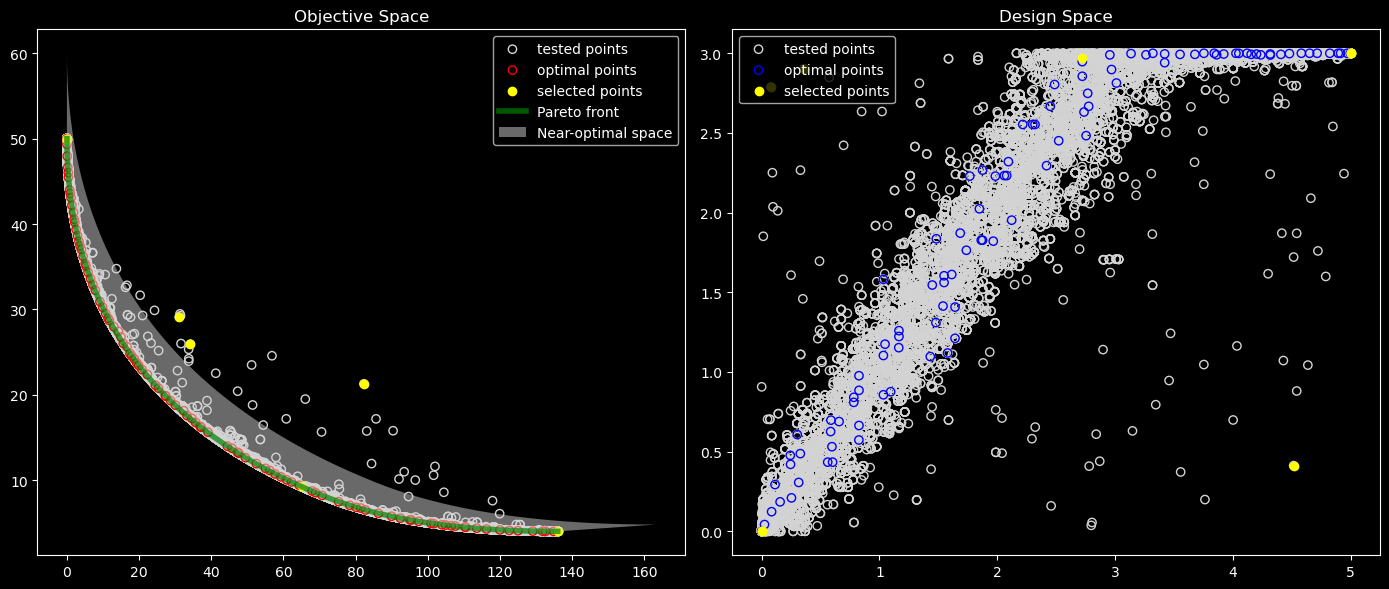

In [13]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(1,2, figsize=(14,6))

    ax[0].set_title("Objective Space")
    ax[0].scatter(F_hist[:,0], F_hist[:,1], facecolor="none", edgecolor="lightgray", label='tested points')
    ax[0].scatter(res.F[:,0], res.F[:,1], facecolor="none", edgecolor="red", label='optimal points')
    ax[0].scatter(F_select[:,0], F_select[:,1], facecolor="yellow", edgecolor="yellow", label='selected points')
    ax[0].plot(F[:,0], F[:,1], color="g", alpha=0.7, label='Pareto front', lw=4)
    ax[0].fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
    ax[0].legend()


    ax[1].set_title("Design Space")
    ax[1].scatter(X_hist[:,0], X_hist[:,1], facecolor="none", edgecolor="lightgray", label='tested points')
    ax[1].scatter(res.X[:,0], res.X[:,1], facecolor="none", edgecolor="blue", label='optimal points')
    ax[1].scatter(X_select[:,0], X_select[:,1], facecolor="yellow", edgecolor="yellow", label='selected points')
    ax[1].legend(loc='upper left')
    plt.tight_layout()
    plt.show()